In [16]:
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.model_selection import learning_curve

In [61]:
wine_data = fetch_ucirepo(id=109)
breast_cancer_data = fetch_ucirepo(id=17)
# adult_data = fetch_ucirepo(id=2)



In [34]:
# Using adult data
# Some preprocessing steps
features_df = pd.read_csv('data/adult_data_features.csv')

# Replacing "?" with np.NaN
features_df = features_df.replace("?", np.NaN)

# Dropping all rows with one or more null attributes
features_df = features_df.dropna()

# Dropping 'education' column since 'education-num' is the same column in numerical format
# Dropping 'fnlgwt' since don't know what it means
# features_df[['education', 'education-num']]
features_df = features_df.drop(['education', 'fnlwgt'], axis=1)

# Converting all categorical variables using one hot encoding
features_df = pd.get_dummies(features_df, columns=['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'native-country', 'sex'], dtype='int')

# Changing dtype to float
features_df = features_df.astype('float')

features_df


,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,sex_Female,sex_Male
0,39.0,13.0,2174.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,50.0,13.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,38.0,9.0,0.0,0.0,40.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,53.0,7.0,0.0,0.0,40.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,28.0,13.0,0.0,0.0,40.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33.0,13.0,0.0,0.0,40.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
48837,39.0,13.0,0.0,0.0,36.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
48839,38.0,13.0,0.0,0.0,50.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
48840,44.0,13.0,5455.0,0.0,40.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [78]:
# Get corresponding labels
labels = pd.read_csv('data/adult_data_targets.csv')
labels = labels.loc[features_df.index, :]

# Sanitizing the labels by replacing "<=50K." with "<=50K" and ">50K." with ">50K"
labels.replace({"<=50K.": "<=50K", ">50K.": ">50K"}, inplace=True)

# Change the labels to 0 and 1
labels = labels.map(lambda x : 1 if x == ">50K" else 0)

labels.value_counts()


income
0         443
1         126
Name: count, dtype: int64

In [37]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_df, labels, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions
y_pred = mlp.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.3f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Print confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Test accuracy: 0.820
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.91      0.88      6745
         1.0       0.67      0.56      0.61      2300

    accuracy                           0.82      9045
   macro avg       0.77      0.74      0.75      9045
weighted avg       0.81      0.82      0.81      9045

Confusion Matrix:
[[6115  630]
 [1002 1298]]


In [8]:
# Define the model
mlp = MLPClassifier(hidden_layer_sizes=(64), activation='relu', solver='adam', max_iter=2000, random_state=42)

# Train the model
mlp.fit(X_train, np.array(y_train))

# Make predictions
y_pred = mlp.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.3f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Print confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

c:\Users\aamir\miniconda3\envs\a1_ml\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test accuracy: 0.844
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90      6745
         1.0       0.72      0.64      0.67      2300

    accuracy                           0.84      9045
   macro avg       0.80      0.78      0.79      9045
weighted avg       0.84      0.84      0.84      9045

Confusion Matrix:
[[6174  571]
 [ 839 1461]]


In [9]:
# Define the model
mlp = MLPClassifier(hidden_layer_sizes=(32,32), activation='relu', solver='adam', max_iter=2000, random_state=42)

# Train the model
mlp.fit(X_train, np.array(y_train))

# Make predictions
y_pred = mlp.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.3f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Print confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

c:\Users\aamir\miniconda3\envs\a1_ml\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test accuracy: 0.841
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90      6745
         1.0       0.72      0.62      0.66      2300

    accuracy                           0.84      9045
   macro avg       0.80      0.77      0.78      9045
weighted avg       0.84      0.84      0.84      9045

Confusion Matrix:
[[6181  564]
 [ 875 1425]]


In [11]:
# Trying to frame it as a regression problem
# Convert the output to 0 or 1 by rounding

from sklearn.neural_network import MLPRegressor

# Define the model
mlp = MLPRegressor(hidden_layer_sizes=(32), activation='relu', solver='adam', max_iter=2000, random_state=42)

# Train the model
mlp.fit(X_train, y_train)

# Get predictions
y_pred = mlp.predict(X_test)

y_pred = np.array(y_pred > 0.5, dtype='float')

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.3f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Print confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


c:\Users\aamir\miniconda3\envs\a1_ml\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test accuracy: 0.852
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90      6745
         1.0       0.77      0.60      0.68      2300

    accuracy                           0.85      9045
   macro avg       0.82      0.77      0.79      9045
weighted avg       0.85      0.85      0.85      9045

Confusion Matrix:
[[6318  427]
 [ 909 1391]]


In [12]:
# Define the model
mlp = MLPRegressor(hidden_layer_sizes=(64), activation='relu', solver='adam', max_iter=2000, random_state=42)

# Train the model
mlp.fit(X_train, y_train)

# Get predictions
y_pred = mlp.predict(X_test)

y_pred = np.array(y_pred > 0.5, dtype='float')

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.3f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Print confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

c:\Users\aamir\miniconda3\envs\a1_ml\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test accuracy: 0.851
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90      6745
         1.0       0.77      0.58      0.67      2300

    accuracy                           0.85      9045
   macro avg       0.82      0.76      0.79      9045
weighted avg       0.85      0.85      0.84      9045

Confusion Matrix:
[[6353  392]
 [ 955 1345]]


In [13]:
# Define the model
mlp = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=2000, random_state=42)

# Train the model
mlp.fit(X_train, y_train)

# Get predictions
y_pred = mlp.predict(X_test)

y_pred = np.array(y_pred > 0.5, dtype='float')

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.3f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Print confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

c:\Users\aamir\miniconda3\envs\a1_ml\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test accuracy: 0.847
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90      6745
         1.0       0.74      0.61      0.67      2300

    accuracy                           0.85      9045
   macro avg       0.81      0.77      0.79      9045
weighted avg       0.84      0.85      0.84      9045

Confusion Matrix:
[[6260  485]
 [ 897 1403]]


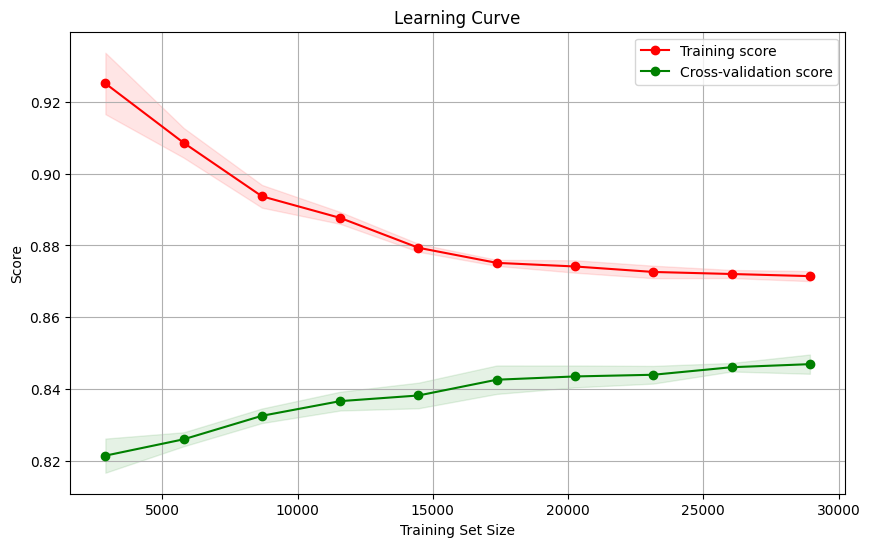

In [18]:
## Plotting learning curves
mlp = MLPClassifier(hidden_layer_sizes=(32), activation='relu', solver='adam', max_iter=2000, random_state=42)
def plot_learning_curve(train_sizes, train_scores, test_scores):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-validation score')

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')

    plt.title('Learning Curve')
    plt.xlabel('Training Set Size')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

train_sizes, train_scores, test_scores = learning_curve(mlp, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
plot_learning_curve(train_sizes, train_scores, test_scores)



In [81]:
features_df = pd.read_csv('data/breast_cancer_data_features.csv')
labels = pd.read_csv('data/breast_cancer_data_targets.csv')

labels = labels.map(lambda x : 0 if x == 'B' else 1)

labels.value_counts()

Diagnosis
0            357
1            212
Name: count, dtype: int64

In [82]:
features_df

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [84]:
labels.value_counts()

Diagnosis
0            357
1            212
Name: count, dtype: int64